In [2]:
%load_ext autoreload

In [386]:
%autoreload 2
import molparse as mp
from rdkit import Chem
from rdkit.Chem import PandasTools
from pathlib import Path
from posebutcher import PoseButcher
from tqdm import tqdm
import pandas as pd
import plotly.express as px
import numpy as np

# Paths

In [103]:
x0310_pdb = Path('/Users/tfb64483/Data/A71EV2A/Design_Wave2/pdbs/x0310_original.pdb')
x0528_pdb = Path('/Users/tfb64483/Data/A71EV2A/Design_Wave2/pdbs/x0528.pdb')
x0875_pdb = Path('/Users/tfb64483/Data/A71EV2A/Design_Wave2/pdbs/x0875.pdb')
mf_x0310 = Path('/Users/tfb64483/Software/PoseButcher/butcher_2a_x0310/protein.pdb')

# Butchers

In [105]:
butcher_x0310 = PoseButcher.from_directory('butcher_2a_x0310')
butcher_x0528 = PoseButcher.from_directory('butcher_2a_x0528')
butcher_x0875 = PoseButcher.from_directory('butcher_2a_x0875')
butcher_mf_x0310 = PoseButcher.from_directory('butcher_2a_mf_x0310')

 DISK  Reading butcher_2a_x0310/butcher_2a_x0310.json
 DISK  Reading butcher_2a_x0310/_fragment_atomgroup.pdb
 DISK  Reading butcher_2a_x0310/protein.pdb
 DISK  Writing _butcher_protein.pdb
 DISK  Reading butcher_2a_x0310/_protein_hull.ply
 DISK  Reading butcher_2a_x0310/_protein_mesh.ply
 DISK  Reading butcher_2a_x0310/pocket_P1.ply
 DISK  Reading butcher_2a_x0310/pocket_P2.ply
 DISK  Reading butcher_2a_x0310/pocket_P1'.ply
 DISK  Reading butcher_2a_x0310/pocket_P2'.ply
 DISK  Reading butcher_2a_x0310/pocket_P3.ply
 DISK  Reading butcher_2a_x0310/pocket_P4.ply
 DISK  Reading butcher_2a_x0310/pocket_P5.ply
 DISK  Reading butcher_2a_x0310/pocket_P6.ply
 SUCCESS  PoseButcher loaded!
 DISK  Reading butcher_2a_x0528/butcher_2a_x0528.json
 DISK  Reading butcher_2a_x0528/_fragment_atomgroup.pdb
 DISK  Reading butcher_2a_x0528/protein.pdb
 DISK  Writing _butcher_protein.pdb
 DISK  Reading butcher_2a_x0528/_protein_hull.ply
 DISK  Reading butcher_2a_x0528/_protein_mesh.ply
 DISK  Reading butch

# FEGrow

In [29]:
butcher_x0310._crystal = 'x0310'
butcher_x0528._crystal = 'x0528'
butcher_x0875._crystal = 'x0875'

fegrow_x0351_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x0351_p2_elab/x0358-P2-elab.sdf')
fegrow_x0351_butcher = butcher_x0310

fegrow_x0528_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x0528_x0556/x0528_elab_p2_p3.sdf')
fegrow_x0528_butcher = butcher_x0528

fegrow_x0875_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x0875_elab/x0875_elab.sdf')
fegrow_x0875_butcher = butcher_x0875

fegrow_x1097a_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x1097_x0310/x1097_x0310.sdf')
fegrow_x1097a_butcher = butcher_x0310

fegrow_x1097b_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x1097_x0739/x1097-x0739-quinoline-P3.sdf')
fegrow_x1097b_butcher = butcher_x0310

fegrow_x1097c_sdf = Path('/Users/tfb64483/Data/A71EV2A/FEGrow/iteration2/x1097_x0922/x1097-x0922.sdf')
fegrow_x1097c_butcher = butcher_x0310

In [131]:
def clean_fegrow(df):
    
    ss = []
    zs = []
    
    for i,row in df.iterrows():
        split = row.smiles.split(' ')
        if len(split) == 1:
            s = split[0]
            z = row.ID
        else:
            s,z = split
        ss.append(s)
        
        zs.append(z)
        
    df['smiles'] = ss
    df['ID'] = zs
    
    return df

In [132]:
def add_butcher_cols(df, butcher):
    
    data = {}
    
    for mol in tqdm(df.ROMol):
        summary = butcher.chop(mol, draw=False, count=True)
        
        for k,v in summary.items():
            if k not in data:
                data[k] = []
            data[k].append(v)
    
    for k,v in data.items():
        
        name = f'butcher #{k}'
        
        df[name] = v

In [403]:
pairs = [
(fegrow_x0351_sdf, fegrow_x0351_butcher),
(fegrow_x0528_sdf, fegrow_x0528_butcher),
(fegrow_x0875_sdf, fegrow_x0875_butcher),
(fegrow_x1097a_sdf, fegrow_x1097a_butcher),
(fegrow_x1097b_sdf, fegrow_x1097b_butcher),
(fegrow_x1097c_sdf, fegrow_x1097c_butcher),
]

In [404]:
dfs = []

for sdf, butcher in pairs:
    print(sdf.name)
    df = PandasTools.LoadSDF(sdf)
    df['origin'] = [sdf.name]*len(df)
    df['ref_pdb'] = [butcher._crystal]*len(df)
    df = clean_fegrow(df)
    add_butcher_cols(df, butcher)
    df.head()
    
    dfs.append(df)

x0358-P2-elab.sdf


100%|█████████████████████████████████████████| 100/100 [01:14<00:00,  1.34it/s]


x0528_elab_p2_p3.sdf


100%|█████████████████████████████████████████| 100/100 [01:12<00:00,  1.37it/s]


x0875_elab.sdf


100%|█████████████████████████████████████████| 100/100 [01:08<00:00,  1.46it/s]


x1097_x0310.sdf


100%|█████████████████████████████████████████| 100/100 [01:30<00:00,  1.10it/s]


x1097-x0739-quinoline-P3.sdf


100%|█████████████████████████████████████████| 100/100 [04:34<00:00,  2.74s/it]


x1097-x0922.sdf


100%|█████████████████████████████████████████| 100/100 [01:15<00:00,  1.32it/s]


In [423]:
all_fg = pd.concat(dfs, ignore_index=True)

In [424]:
all_fg['cnnaffinity'] = [float(v) for v in all_fg['cnnaffinity'].values]

In [425]:
for df in dfs:
    df['cnnaffinity'] = [float(v) for v in df['cnnaffinity'].values]

## Trace inspirations

In [426]:
fg_inspirations = {
    'x0358-P2-elab.sdf': 'A71x0351a', # 'x0358',
    'x0528_elab_p2_p3.sdf': 'A71x0528a,A71x0556a', # 'x0528',
    'x0875_elab.sdf': 'A71x0875a', # 'x0875',
    'x1097_x0310.sdf': 'A71x0310a', # 'x1097,x0310',
    'x1097-x0739-quinoline-P3.sdf': 'A71x0739a', # 'x1097,x0739',
    'x1097-x0922.sdf': 'A71x0922a', # 'x1097,x0922',
}

## Output All FEGrow

In [427]:
insps = []
for i,row in all_fg.iterrows():
    insps.append(fg_inspirations[row.origin])
all_fg['ref_mols'] = insps

In [428]:
all_fg = all_fg.rename(columns={"reference":"ref_pdb"})

In [429]:
PandasTools.WriteSDF(all_fg, 'all_2A_iter2_fegrow.sdf', idName='ID', properties=all_fg.columns)

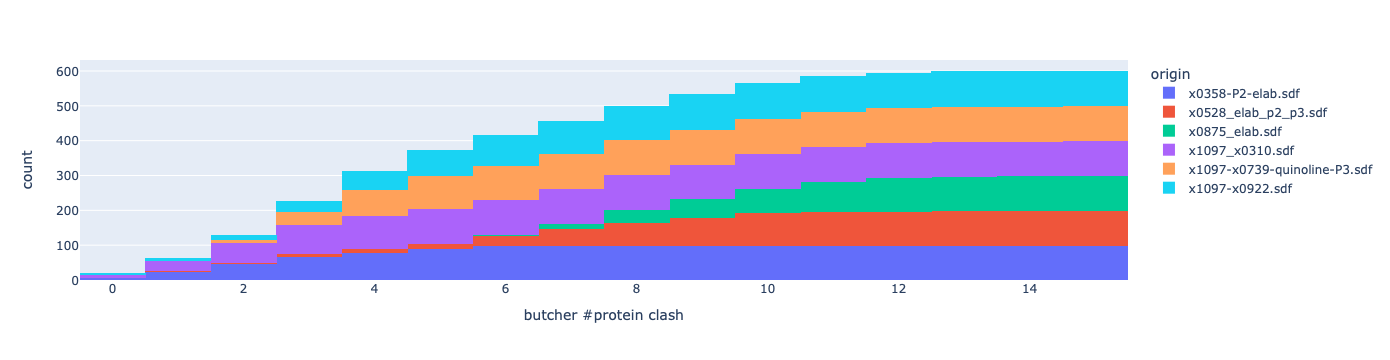

In [430]:
px.histogram(all_fg, x='butcher #protein clash', color='origin', cumulative=True)

In [431]:
all_fg.head()

,cnnaffinity,cnnaffinityIC50,smiles,ID,ROMol,origin,ref_pdb,butcher #BAD,butcher #GOOD,butcher #protein clash,...,butcher #pocket,butcher #P1,butcher #P2,butcher #P1',butcher #P2',butcher #P3,butcher #P4,butcher #P5,butcher #P6,ref_mols
0,-5.88290,1309.4834079858076 nanomolar,O=C1NC(=O)C2(CCN(C(=O)C3=CC=CC4=C3OCO4)CC2)N1,Z700712754,<rdkit.Chem.rdchem.Mol object at 0x16f737760>,x0358-P2-elab.sdf,x0310,5,18,5,...,18,14,4,0,0,0,0,0,0,A71x0351a
1,-5.85667,1391.009192366978 nanomolar,CC(NC(=O)C1=CC(Br)=CC2=C1OCO2)C1=NN=NN1C1CC1,Z3939980768,<rdkit.Chem.rdchem.Mol object at 0x16f7077d0>,x0358-P2-elab.sdf,x0310,5,18,3,...,18,12,5,1,0,0,0,0,0,A71x0351a
2,-5.84543,1427.4798941981692 nanomolar,CC(C)N(CCC1=NNN=N1)C(=O)CC1=CC=CC2=C1OCO2,Z5413245914,<rdkit.Chem.rdchem.Mol object at 0x16f7075a0>,x0358-P2-elab.sdf,x0310,5,18,3,...,18,11,1,6,0,0,0,0,0,A71x0351a
3,-5.81261,1539.5365361457957 nanomolar,O=C(NCC1=CC=CC2=C1OCO2)N1CCC2=C(C=C(Cl)S2)C1,Z2433441736,<rdkit.Chem.rdchem.Mol object at 0x16f706a40>,x0358-P2-elab.sdf,x0310,0,23,0,...,23,11,0,7,5,0,0,0,0,A71x0351a
4,-5.80538,1565.3807901707244 nanomolar,CC(C)(NC(=O)C1=C2OC(F)(F)OC2=CC=C1Br)C1=NOC=N1,Z5515073476,<rdkit.Chem.rdchem.Mol object at 0x16f706880>,x0358-P2-elab.sdf,x0310,8,15,6,...,15,12,2,1,0,0,0,0,0,A71x0351a


## Top 20 from each series

In [471]:
fg_top120 = pd.concat([df[df['butcher #protein clash'] < 9][:20] for df in dfs], ignore_index=True)
# fg_top120 = pd.concat([df[:20] for df in dfs], ignore_index=True)
assert len(fg_top120) == 120, len(fg_top120)

In [472]:
insps = []
for i,row in fg_top120.iterrows():
    insps.append(fg_inspirations[row.origin])
fg_top120['ref_mols'] = insps

In [473]:
fg_top120 = fg_top120.rename(columns={"reference":"ref_pdb"})

In [474]:
fg_top120['ref_pdb'] = [f'A71{v}a' for v in fg_top120['ref_pdb']]

In [475]:
PandasTools.WriteSDF(fg_top120, 'filtered_2A_iter2_fegrow.sdf', idName='ID', properties=fg_top120.columns)

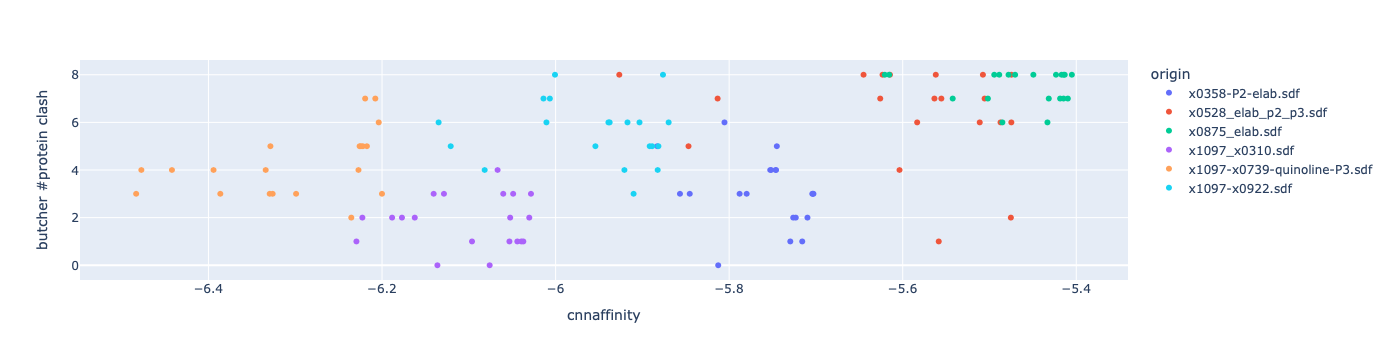

In [476]:
px.scatter(fg_top120, x='cnnaffinity', y='butcher #protein clash', color='origin')
# px.histogram(fg_top120, x='butcher #protein clash', color='origin', cumulative=True)

## Export by ref_pdb

In [444]:
refs = set(fg_top120['ref_pdb'].values)
refs

{'A71x0310a', 'A71x0528a', 'A71x0875a'}

In [445]:
for ref in refs:
    subset = fg_top120[fg_top120['ref_pdb'] == ref]
    PandasTools.WriteSDF(subset, f'filtered_2A_iter2_fegrow_{ref}.sdf', idName='ID', properties=fg_top120.columns)

In [ ]:
## Prepare for Fragalysis

In [457]:
import pandas as pd
from rdkit.Chem import AllChem, PandasTools
from rdkit import Chem
from datetime import date
from typing import Optional, List
import operator
def align(mol_series: pd.Series, ref_hit: Chem.Mol, used_hit: Chem.Mol) -> pd.Series:
    """
    It happens...
    Sometimes you might have a series of followups that are in frame with a hit,
    but that is not the same as in Fragalysis.
    This function aligns a pd.Series of molecules the former to the latter's frame.

    :param mol_series:
    :param ref_hit:
    :param used_hit:
    :return:
    """
    rototrans = AllChem.GetAlignmentTransform(used_hit, ref_hit)[1]
    new_mols = mol_series.apply(lambda mol: Chem.Mol())
    new_mols.apply(lambda mol: AllChem.TransformConformer(mol.GetConformer(), rototrans))
    return new_mols

def floatify(value):
    try:
        return float(value)
    except Exception:
        return float('nan')

def prep(df: pd.DataFrame,
         header: Chem.Mol,
         mol_col: str,
         name_col: str,
         outfile: str='for_fragalysis.sdf',
         ref_mol_names: Optional[str]=None,
         ref_pdb_name: Optional[str]=None,
         extras: Optional[dict]=None,
         letter_trim: int=20) -> None:
    """
    Prepare a SDF file for Fragalysis.


    :param df: dataframe with molecules
    :param header: Chem.Mol generated by ``generate_header`` for example
    :param mol_col: name of the column containing the molecules
    :param name_col: name of the column containing the names
    :param outfile: name of the output file
    :param ref_mol_names: comma separated list of names of the reference molecules (for all hits). Ignored if present.
    :param ref_pdb_name: name of the protein to use. Ignored if present.
    :param extras: Extra fields to add to the SDF file, these need to be in the ``header`` Chem.Mol
    :return:
    """
    # no tuple columns
    assert isinstance(df, pd.DataFrame), f'{df} is not a DataFrame'
    df = df.rename(columns={c: ':'.join(map(str, c)) for c in df.columns if isinstance(c, tuple)}).copy()
    # sort inputs
    if 'ref_mols' in df.columns:
        pass
    elif ref_mol_names:
        df['ref_mols'] = ref_mol_names
    else:
        ValueError('ref_mol_names is None and ref_mols is not in df.columns')
    if 'original SMILES' in df.columns:
        pass
    else:
        df['original SMILES'] = df[mol_col].apply(AllChem.RemoveAllHs).apply(Chem.MolToSmiles)
    if 'ref_pdb' in df.columns:
        pass
    elif ref_pdb_name:
        df['ref_pdb'] = ref_pdb_name
    else:
        ValueError('ref_pdb is None and ref_pdb is not in df.columns')
    # deal with extras
    if extras is None:
        extra_fields = []
    elif extras is True:
        extras = []
        for col in df.columns:
            df[col] = df[col].apply(floatify)
            if df[col].fillna(0).apply(abs).sum() > 0:
                extras.append(col)
    elif isinstance(extras, dict):
        extra_fields = list(extras.keys())
    elif isinstance(extras, list):
        extra_fields = extras
    else:
        raise ValueError('extras should be a dict or a list')
    df = df.copy()
    df[name_col] = df[name_col].apply(str)\
                                .str.replace(r'\W', '_', regex=True)\
                                .apply(operator.itemgetter(slice(None, int(letter_trim))))
    with open(outfile, 'w') as sdfh:
        with Chem.SDWriter(sdfh) as w:
            w.write(header)
        PandasTools.WriteSDF(df, sdfh, mol_col, name_col,
                             ['ref_pdb', 'ref_mols', 'original SMILES'] + extra_fields)

def floatify_columns(df: pd.DataFrame, columns: List[str]) -> pd.DataFrame:
    df = df.copy()
    for col in df.columns:
        df[col] = df[col].apply(floatify)

def generate_header(method: str,
                    ref_url: Optional[str]= 'https://www.example.com',
                    submitter_name: Optional[str]= 'unknown',
                    submitter_email: Optional[str] = 'a@b.c',
                    submitter_institution: Optional[str] = 'Nowehere',
                    generation_date: Optional[str] = str(date.today()),
                    smiles: Optional[str] = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
                    extras: Optional[dict] = None) -> Chem.Mol:
    """
    Generate a header Chem.Mol for a SDF file in the ver_1.2 style.
    cf. https://discuss.postera.ai/t/providing-computed-poses-for-others-to-look-at/1155/6

    :param method: **Unique** and compulsory. Note that it will be bleached.
    :param ref_url:
    :param submitter_name:
    :param submitter_email:
    :param submitter_institution:
    :param generation_date:
    :param smiles:
    :param extras:  A dictionary of extra properties to add to the header.
                    These will be present in all the molecules in the SDF for sortable tables!
    :return: Chem.Mol
    """
    bannermol = Chem.MolFromSmiles(smiles)
    bannermol.SetProp('_Name', 'ver_1.2')
    AllChem.EmbedMolecule(bannermol)
    if extras is None:
        extras = {}
    for k, v in {'ref_url': ref_url,
                 'submitter_name': submitter_name,
                 'submitter_email': submitter_email,
                    'submitter_institution': submitter_institution,
                 'generation_date': generation_date,
                 'method': method,
                 }.items():
        bannermol.SetProp(k, v)
    for k, v in extras.items():
        bannermol.SetProp(k, str(v))
    return bannermol


class DummyMasker:
    """
    Copied form rdkit_to_params.utils !

    A context manager that allows operations on a mol containing dummy atoms (R/*) that
    otherwise would raise an RDKit error.
    It simply masks and unmasks the dummy atoms.

    >>> mol = Chem.MolFromSmiles('*CCC(C)C')
    >>> with DummyMasker(mol):
    >>>     AllChem.EmbedMolecule(mol)

    The input options for dummy maker are ``mol`` (Chem.Mol),
    ``placekeeper_zahl`` (Z for atomic number),
    and ``blank_Gasteiger`` to make the dummy atom's '_GasteigerCharge' property zero if present.
    The Zahl of the placekeeping element will affect the Gasteiger partial chargers of nearby atoms though.
    """

    def __init__(self,
                 mol: Chem.Mol,
                 placekeeper_zahl:int=6,
                 blank_Gasteiger:bool=True):
        self.mol = mol
        self.is_masked = False
        self.zahl = int(placekeeper_zahl)
        self.blank_Gasteiger = bool(blank_Gasteiger)
        self.dummies = list(  mol.GetAtomsMatchingQuery(Chem.rdqueries.AtomNumEqualsQueryAtom(0))  )

    def mask(self):
        for dummy in self.dummies:
            dummy.SetAtomicNum(self.zahl)
            dummy.SetBoolProp('dummy', True)
            dummy.SetHybridization(Chem.HybridizationType.SP3)
        self.is_masked = True

    def unmask(self):
        for dummy in self.dummies:
            assert dummy.HasProp('dummy'), 'The atoms have changed somehow? (weird cornercase)'
            dummy.SetAtomicNum(0)
            if dummy.HasProp('_GasteigerCharge') and self.blank_Gasteiger:
                dummy.SetDoubleProp('_GasteigerCharge', 0.)
        self.is_masked = False

    def __enter__(self):
        self.mask()
        return self

    def __exit__(self, exc_type: Exception, exc_value: str, exc_traceback: 'bultins.traceback'):
        self.unmask()

In [477]:
fg_top120.columns

Index(['cnnaffinity', 'cnnaffinityIC50', 'smiles', 'ID', 'ROMol', 'origin',
       'ref_pdb', 'butcher #BAD', 'butcher #GOOD', 'butcher #protein clash',
       'butcher #solvent space', 'butcher #pocket', 'butcher #P1',
       'butcher #P2', 'butcher #P1'', 'butcher #P2'', 'butcher #P3',
       'butcher #P4', 'butcher #P5', 'butcher #P6', 'ref_mols'],
      dtype='object')

In [478]:
header.GetPropsAsDict().keys()

dict_keys(['ref_url', 'submitter_name', 'submitter_email', 'submitter_institution', 'generation_date', 'method', 'cnnaffinity', 'cnnaffinityIC50', 'origin', 'ref_pdb', 'butcher #BAD', 'butcher #GOOD', 'butcher #protein clash', 'butcher #solvent space', 'butcher #pocket', 'butcher #P1', 'butcher #P2', "butcher #P1'", "butcher #P2'", 'butcher #P3', 'butcher #P4', 'butcher #P5', 'butcher #P6', 'ref_mols'])

In [480]:
for key in header.GetPropsAsDict():
    if key not in fg_top120.columns:
        print(key)
        fg_top120[key] = [np.nan]*len(fg_top120)

ref_url
submitter_name
submitter_email
submitter_institution
generation_date
method


In [482]:
fg_top120.columns

Index(['cnnaffinity', 'cnnaffinityIC50', 'smiles', 'ID', 'ROMol', 'origin',
       'ref_pdb', 'butcher #BAD', 'butcher #GOOD', 'butcher #protein clash',
       'butcher #solvent space', 'butcher #pocket', 'butcher #P1',
       'butcher #P2', 'butcher #P1'', 'butcher #P2'', 'butcher #P3',
       'butcher #P4', 'butcher #P5', 'butcher #P6', 'ref_mols', 'ref_url',
       'submitter_name', 'submitter_email', 'submitter_institution',
       'generation_date', 'method'],
      dtype='object')

In [490]:
extras = {
    'cnnaffinity': 'predicted affinity',
    'cnnaffinityIC50': 'predicted IC50',
    'origin':'name of original SDF',
    'ref_pdb': 'LHS reference observation',
    'butcher #BAD':'butcher #BAD',
    'butcher #GOOD':'butcher #GOOD',
    'butcher #protein clash':'butcher #protein clash',
    'butcher #solvent space':'butcher #solvent space',
    'butcher #pocket':'butcher #pocket',
    'butcher #P1':'butcher #P1',
    'butcher #P2':'butcher #P2',
    "butcher #P1'":"butcher #P1'",
    "butcher #P2'":"butcher #P2'",
    'butcher #P3':'butcher #P3',
    'butcher #P4':'butcher #P4',
    'butcher #P5':'butcher #P5',
    'butcher #P6':'butcher #P6',
    'ref_mols': 'inspiration observations',
    'method':'FEGrow',
    'submitter_name':'Josh Horton',
    'submitter_institution':'Newcastle',
    'generation_date':'2024-02-16',
    'submitter_email':'submitter_email',
    'ref_url':'https://github.com/jthorton/EV-A71-2A-elaborations',
}

header = generate_header(
    method='FEGrow', 
    ref_url='https://github.com/jthorton/EV-A71-2A-elaborations', 
    submitter_name='Josh Horton', 
    submitter_email='joshua.horton@openforcefield.org',
    submitter_institution='Newcastle',
    extras=extras,
)

fg_top120['ref_url'] = ['joshua.horton@openforcefield.org']*120
# fg_top120['submitter_name'] = ['Josh Horton']*120
fg_top120['generation_date'] = [header.GetProp('generation_date')]*120

prep(fg_top120, header=header, mol_col='ROMol', name_col='ID', outfile='filtered_2A_iter2_fegrow_top120_fragalysis.sdf', extras=extras)

    # :param df: dataframe with molecules
    # :param header: Chem.Mol generated by ``generate_header`` for example
    # :param mol_col: name of the column containing the molecules
    # :param name_col: name of the column containing the names
    # :param outfile: name of the output file
    # :param ref_mol_names: comma separated list of names of the reference molecules (for all hits). Ignored if present.
    # :param ref_pdb_name: name of the protein to use. Ignored if present.
    # :param extras: Extra fields to add to the SDF file, these need to be in the ``header`` Chem.Mol

[12:07:05] Molecule does not have explicit Hs. Consider calling AddHs()


# Fragmenstein

In [200]:
# matteo SDF
mf_sdf = Path('/Users/tfb64483/Data/A71EV2A/Matteo/iteration-2/results/A71-ROCS-iter2.sdf')

In [235]:
mf = PandasTools.LoadSDF(mf_sdf)
# header = mf.iloc[0,:]
# mf = mf.iloc[1:, :] 
# mf = mf.drop(columns=['ref_url', 'submitter_name', 'submitter_email', 'submitter_institution', 'generation_date', 'method'])

In [236]:
mf_top120 = pd.DataFrame(mf.iloc[:121,:])

In [239]:
mf_top120['origin'] = ['A71-ROCS-iter2.sdf']*len(mf_top120)
mf_top120['ref_pdb'] = ['x0310']*len(mf_top120)
add_butcher_cols(mf_top120, butcher_x0310)

100%|█████████████████████████████████████████| 121/121 [01:06<00:00,  1.83it/s]


In [243]:
# Sanitise ref_mols

In [249]:
ref_mols = set()
for s in mf_top120['ref_mols'][1:]:
    
    for m in s.split(','):
        if m not in ref_mols:
            ref_mols.add(m)
                         
ref_mols

{'x0310_0A',
 'x0446_0A',
 'x0528_0A',
 'x0719_0A',
 'x0812_0A',
 'x0929_0A',
 'x1080_0A',
 'x1140_0A'}

In [391]:
ref_lookup = {
    'x0310': 'A71x0310a',
    'x0310_0A': 'A71x0310a',
    'x0446_0A': 'A71x0446a',
    'x0528_0A': 'A71x0528a',
    'x0719_0A': 'A71x0719a',
    'x0812_0A': 'A71x0812a',
    'x0929_0A': None,
    'x1080_0A': 'A71x1080a',
    'x1140_0A': 'A71x1140a',
    'A71x0310a': 'A71x0310a',
    'A71x0446a': 'A71x0446a',
    'A71x0528a': 'A71x0528a',
    'A71x0719a': 'A71x0719a',
    'A71x0732a': 'A71x0732a',
    'A71x0812a': 'A71x0812a',
    'A71x1080a': 'A71x1080a',
    'A71x1140a': 'A71x1140a',
    'A71x0473a': None,
    'A71x0929a': None,
    'ax0437a': None,
    'ax0473a': 'A71x0473a',
    'ax0732a': 'A71x0732a',
    'ax0375a': 'A71x0375b',
    'ax0375b': 'A71x0375b',
    'A71x0375b': 'A71x0375b',
    'A71x0556a': 'A71x0556a',
    'ax0556a': 'A71x0556a',
    
    'ax0310a': 'A71x0310a',
    'ax0446a': 'A71x0446a',
    'ax0528a': 'A71x0528a',
    'ax0719a': 'A71x0719a',
    'ax0812a': 'A71x0812a',
    'ax0929a': None,
    'ax1080a': 'A71x1080a',
    'ax0922a':'A71x0922a',
    'ax0739a':'A71x0739a',
    'A71x0739a':'A71x0739a',
    'A71x0922a':'A71x0922a',
    'ax0416a':'A71x0416a',
    'A71x0416a':'A71x0416a',
    'ax0450a':'A71x0450a',
    'A71x0450a':'A71x0450a',
    'ax0554a':'A71x0554a',
    'A71x0554a':'A71x0554a',
    'ax0884a':'A71x0884a',
    'A71x0884a':'A71x0884a',
    'ax0911a':'A71x0911a',
    'A71x0911a':'A71x0911a',
    'ax0351a':'A71x0351a',
    'A71x0351a':'A71x0351a',
    'ax0566a':'A71x0566a',
        'A71x0566a':'A71x0566a',
    'ax0515a':'A71x0515a',
    'A71x0515a':'A71x0515a',
    'ax0451a':'A71x0451a',
        'A71x0451a':'A71x0451a',
}

def fix_refs(s):
    if not s:
        return 'A71x0310a' #np.nan
    fix = []
    # print(s)
    for m in s.split(','):
        n = ref_lookup[m]
        if n:
            fix.append(n)
    return ','.join(fix)

In [382]:
for i,row in mf_top120.iterrows():
    mf_top120.at[i,'ref_pdb'] = ref_lookup[row.ref_pdb]
    if i == 0:
        continue
    mf_top120.at[i,'ref_mols'] = fix_refs(row.ref_mols)

In [495]:
mf_top120.at[0,'method'] = 'ROCS'

In [496]:
mf_top120.head()

,ref_url,submitter_name,submitter_email,submitter_institution,generation_date,method,rationale,experiment,cluster_label,cluster_rank,...,butcher #solvent space,butcher #pocket,butcher #P1,butcher #P2,butcher #P1',butcher #P2',butcher #P3,butcher #P4,butcher #P5,butcher #P6
0,https://github.com/matteoferla/EV-A71-2A-elabo...,Matteo Ferla,matteo.ferla@stats.ox.ac.uk,University of Oxford,2024-02-14,ROCS,rationale,experiment,cluster_label,cluster_rank,...,11,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,info info set:bb_whole;hbond:S87+S105+G127; hy...,bb_whole,3,1,...,1,22,15,2,4,0,1,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,info info set:3d;halogenbond:S105; hbond:S87; ...,3d,19,1,...,1,15,11,3,1,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,info info set:bb_densepocket2;hbond:S105+S125;...,bb_densepocket2,4,1,...,3,11,11,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,info info set:bb_densepocket2;hbond:S125+P107;,bb_densepocket2,11,1,...,0,9,9,0,0,0,0,0,0,0


In [497]:
PandasTools.WriteSDF(mf_top120, 'filtered_2A_iter2_ROCS_fragalysis.sdf', idName='ID', properties=mf_top120.columns)

# 2A_Fragmenstein

In [393]:
mw_sdf = Path('/Users/tfb64483/Data/2A_Fragmenstein/MW_2A_12Feb2024_Fragmenstein.sdf')

In [394]:
mw = PandasTools.LoadSDF(mw_sdf)

In [395]:
mw = mw.rename(columns={'lhs_pdb':'ref_pdb'})
mw = mw.drop(columns=['ref_pdb'])

In [396]:
mw['ref_pdb'] = ['LHS reference observation'] + ['A71x0310a']*(len(mw)-1)

In [491]:
mw.at[0,'method'] = 'Fragmenstein'

In [397]:
for i,row in mw.iterrows():
    if i == 0:
        continue
    # print(i,row.ref_mols)
    mw.at[i,'ref_mols'] = fix_refs(row.ref_mols)

In [398]:
add_butcher_cols(mw, butcher_x0310)

100%|███████████████████████████████████████████| 95/95 [00:44<00:00,  2.12it/s]


In [492]:
mw.head()

,ref_url,submitter_name,submitter_email,submitter_institution,generation_date,method,ddG,score,ref_mols,ID,...,butcher #solvent space,butcher #pocket,butcher #P1,butcher #P2,butcher #P1',butcher #P2',butcher #P3,butcher #P4,butcher #P5,butcher #P6
0,https://github.com/matteoferla/Fragmenstein,Max Winokan,max.winokan@diamond.ac.uk,DLS,2024-02-07,Fragmenstein,ddG,score,inspiration observation shortnames,ver_1.2,...,12,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,-6.353283,10.300328,A71x0473a,Z3621038789,...,1,15,0,0,0,0,3,2,8,2
2,NaN,NaN,NaN,NaN,NaN,NaN,-5.066554,25.911535,"A71x0732a,A71x0375b",Z2947991424,...,0,15,9,0,3,0,3,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,-7.63759,8.900272,"A71x0732a,A71x0375b",Z3522021571,...,0,15,8,0,3,0,4,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,-6.226388,13.085709,"A71x0732a,A71x0375b",Z1733136064,...,0,15,10,0,2,0,3,0,0,0


In [493]:
PandasTools.WriteSDF(mw, 'filtered_2A_iter2_MW_Fragmenstein_fragalysis.sdf', idName='ID', properties=mw.columns)